In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
df = pd.read_csv('./nfl_elo.csv')
data_football = pd.read_csv('./train.csv')
df_2 = pd.read_csv('./nflscores1.csv')

win_loss2 = df_2['home.score'] - df_2['away.score']
wcolmn2 = []
for dif in win_loss2:
    if dif > 0:
        wcolmn2.append('W')
    
    else:
        wcolmn2.append('L')

        
df_2['win_loss'] = wcolmn2
df_2['team1'] = df_2['home.team']
df_2['team2'] = df_2['away.team']

seasons = df_2.loc[df_2['season'] == 2014]
seasons.sort_values(by = ['team1', 'date'], inplace = True)

seasons2 = df_2.loc[df_2['season'] == 2015]
seasons2.sort_values(by = ['team1', 'date'], inplace = True)


sea_14_15 = pd.concat([seasons,seasons2])

seasons3 = df.loc[df['season'] == 2014]
seasons4 = df.loc[df['season'] == 2015]
line_season = pd.concat([seasons3, seasons4])
line_season.sort_values(by = ['team1', 'date'], inplace = True)

line_season['line'] = sea_14_15['line'].values
line_season['over_under'] = sea_14_15['over_under'].values
line_season['win_loss'] = sea_14_15['win_loss'].values
line_season['elo_dif'] = line_season['elo1_pre'].values - line_season['elo2_pre'].values + 10

line_season['win_loss'].astype('category', inplace = True)




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as sc
from sklearn.datasets import load_iris

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

X = line_season[['elo_dif', 'line', 'over_under' , 'elo_prob1', 'neutral']].values
Y = line_season['win_loss'].values

scaler = StandardScaler()

Xtrain,Xtest,Ytrain,Ytest = tts(X,Y, test_size=.25, random_state=1693)
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


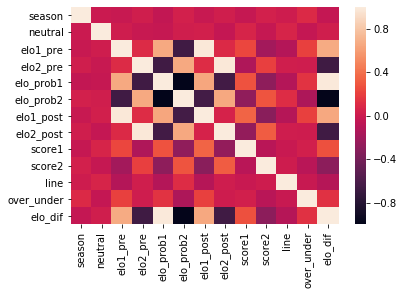

In [7]:
sns.heatmap(line_season.corr())

In [6]:
import seaborn as sns

In [3]:
line_season

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,line,over_under,win_loss,elo_dif
14954,2014-09-08,2014,0,NaN,ARI,LAC,1551.021000,1559.872000,0.580109,0.419891,1556.697000,1554.196000,18,17,-3.0,46.0,W,1.149000
14982,2014-09-21,2014,0,NaN,ARI,SF,1579.632000,1625.705000,0.527211,0.472789,1601.219000,1604.118000,23,14,3.0,41.0,W,-36.073000
15026,2014-10-12,2014,0,NaN,ARI,WSH,1579.299000,1354.892000,0.841037,0.158963,1586.037000,1348.155000,30,20,-5.5,46.5,W,234.407000
15049,2014-10-26,2014,0,NaN,ARI,PHI,1596.012000,1582.113000,0.611632,0.388368,1608.080000,1570.045000,24,20,1.0,48.5,W,23.899000
15075,2014-11-09,2014,0,NaN,ARI,LAR,1636.468000,1459.566000,0.800991,0.199009,1646.833000,1449.202000,31,14,-7.0,43.5,W,186.902000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,2015-11-15,2015,0,NaN,WSH,NO,1372.880220,1466.398397,0.459051,0.540949,1411.532894,1427.745723,47,14,0.0,50.0,W,-83.518176
15377,2015-11-29,2015,0,NaN,WSH,NYG,1403.255116,1524.087110,0.420336,0.579664,1426.402029,1500.940197,20,14,1.0,48.0,W,-110.831993
15397,2015-12-07,2015,0,NaN,WSH,DAL,1426.402029,1473.037814,0.526404,0.473596,1411.684166,1487.755677,16,19,-2.0,43.0,L,-36.635784
15422,2015-12-20,2015,0,NaN,WSH,BUF,1430.093140,1518.680187,0.466108,0.533892,1455.974992,1492.798335,35,25,1.5,44.0,W,-78.587047


In [20]:
df_2

,season,date,away.team,away.score,home.team,home.score,line,over_under,win_loss,team1,team2
0,2014,2014-09-04,GB,16,SEA,36,-5.0,47.0,W,SEA,GB
1,2014,2014-09-07,NO,34,ATL,37,3.0,51.5,W,ATL,NO
2,2014,2014-09-07,MIN,6,STL,34,-3.0,43.5,W,STL,MIN
3,2014,2014-09-07,CLE,27,PIT,30,-6.0,41.5,W,PIT,CLE
4,2014,2014-09-07,JAX,17,PHI,34,-10.0,50.0,W,PHI,JAX
...,...,...,...,...,...,...,...,...,...,...,...
529,2015,2016-01-17,SEA,24,CAR,31,-2.5,42.5,W,CAR,SEA
530,2015,2016-01-17,PIT,16,DEN,23,-7.5,41.0,W,DEN,PIT
531,2015,2016-01-24,NE,18,DEN,20,3.0,44.5,W,DEN,NE
532,2015,2016-01-24,ARI,15,CAR,49,-3.0,47.0,W,CAR,ARI


## Naive Bayes Classifier


In [16]:
nb_class = GaussianNB()
nb_class.fit(Xtrain,Ytrain)
y_pred = nb_class.predict(Xtest)

cm = confusion_matrix(Ytest, y_pred)
print_cm(cm, ['W', 'L'])
print(k_fold_nb)
print('Cross-Validation Score:' + str(k_fold_nb.mean()) )

              W     L 
        W  15.0  49.0 
        L  10.0  60.0 
[0.61818182 0.65454545 0.60377358 0.52830189 0.71698113 0.60377358
 0.60377358 0.58490566 0.56603774 0.64150943]
Cross-Validation Score:0.6121783876500857


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_class = LogisticRegression(solver='lbfgs', max_iter = 1000, multi_class='multinomial',random_state=1)
logistic_class.fit(Xtrain, Ytrain)

y_pred = logistic_class.predict(Xtest)

cm2 = confusion_matrix(Ytest, y_pred)
print_cm(cm2, ['W', 'L'])
print(k_fold)
print('Cross-Validation Score:' + str(k_fold_log.mean()) )

              W     L 
        W  24.0  40.0 
        L  17.0  53.0 
Cross-Validation Score:0.6478902229845626


## RandomForestClassifier


In [19]:
from sklearn.ensemble import RandomForestClassifier
rt_class =RandomForestClassifier(n_estimators=1000, random_state=1693, max_depth =4, min_samples_leaf = 4, min_samples_split = 3)


rt_class.fit(Xtrain, Ytrain)
rt_pred = rt_class.predict(Xtest)
rt_conflat = confusion_matrix(Ytest, rt_pred)
print_cm(rt_conflat, ['W', 'L'])
print(k_fold_rt)
print('Cross-Validation Score:' + str(k_fold_rt.mean()) )

              W     L 
        W  28.0  36.0 
        L  17.0  53.0 
[0.58181818 0.70909091 0.66037736 0.58490566 0.73584906 0.71698113
 0.66037736 0.64150943 0.62264151 0.62264151]
Cross-Validation Score:0.6536192109777016


# Voting Classifier


In [13]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver='saga', multi_class='multinomial',random_state=1693)
clf2 = RandomForestClassifier(n_estimators=1000, random_state=1693, max_depth =4, min_samples_leaf = 4, min_samples_split = 3)
clf3 = GaussianNB()
clf4 = MLPClassifier(hidden_layer_sizes = (50,1,30,7,30), activation='relu', solver='lbfgs', max_iter = 1000, random_state=12)
clf5 = KNeighborsClassifier(n_neighbors=14)


eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('mlp', clf4),('knn', clf5)], voting='hard', weights = [1,1,1,4,1])
model = eclf1.fit(Xtrain, Ytrain)
yypred= model.predict(Xtest)
vt_conflat = confusion_matrix(Ytest, yypred)
print_cm(vt_conflat, ['W', 'L'])

print('Cross-Validation Score:' + str(k_fold.mean()) )

              W     L 
        W  45.0  19.0 
        L  21.0  49.0 
Cross-Validation Score:0.6142024013722127


## K-Neighbors Classifier

In [12]:
Knn = KNeighborsClassifier(n_neighbors=14)
Knn.fit(Xtrain,Ytrain)
y_pred3 = Knn.predict(Xtest)
cm_Knn = confusion_matrix(Ytest,y_pred3)
print_cm(cm_Knn, ['W', 'L'])
print('Cross-Validation Score:' + str(k_fold_Knn.mean()) )

              W     L 
        W  34.0  30.0 
        L  19.0  51.0 
Cross-Validation Score:0.6030874785591767


## Neural Network Classifier

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (50,1,30,7,30), activation='relu', solver='lbfgs', max_iter = 10000, random_state=12)
mlp.fit(Xtrain,Ytrain)
y_pred2 = mlp.predict(Xtest)
cm_nn = confusion_matrix(Ytest,y_pred2)
print_cm(cm_nn, ['W', 'L'])
k_fold_mlp = cross_val_score(estimator = mlp, X = X, y= Y, cv=10,scoring='accuracy')
print('Cross-Validation Score:' + str(k_fold_mlp.mean()) )

              W     L 
        W  44.0  20.0 
        L  19.0  51.0 
Cross-Validation Score:0.5655574614065181



## Cross Validation Scores


In [10]:
from sklearn.model_selection import cross_val_score

k_fold_rt = cross_val_score(estimator = rt_class, X = X, y= Y, cv=10,scoring='accuracy')
k_fold_mlp = cross_val_score(estimator = mlp, X = X, y= Y, cv=10,scoring='accuracy')
k_fold_Knn = cross_val_score(estimator = Knn, X = X, y= Y, cv=10,scoring='accuracy')
k_fold = cross_val_score(estimator = model, X = X, y= Y, cv=10,scoring='accuracy')
k_fold_log = cross_val_score(estimator = logistic_class, X = X, y= Y, cv=10,scoring='accuracy')

k_fold_nb = cross_val_score(estimator = nb_class, X = X, y= Y, cv=10,scoring='accuracy')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

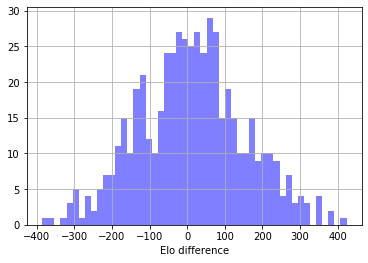

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = line_season['elo_dif'].values
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.grid(True)
plt.xlabel('Elo difference')
plt.ylabel('Frequency')

plt.savefig('elo_differnce.png')

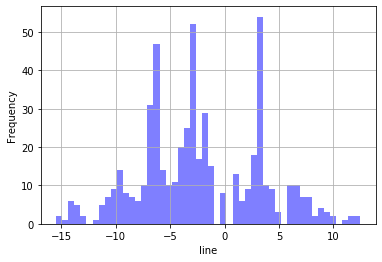

In [8]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = line_season['line'].values
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.grid(True)
plt.xlabel('line')
plt.ylabel('Frequency')

plt.savefig('line.png')

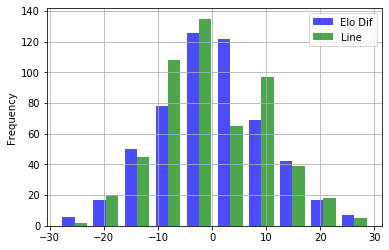

In [19]:
x = line_season['elo_dif'].values
y = line_season['line'].values

st = StandardScaler()
x = preprocessing.scale(x)

y = preprocessing.scale(y)

x = x * 10
y = y * 10
num_bins = 10

n, bins, patches = plt.hist([x,y], num_bins, alpha=0.7, label=['Elo Dif', 'Line'], color =['blue', 'green'])
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel('Frequency')

plt.savefig('two_var.png')

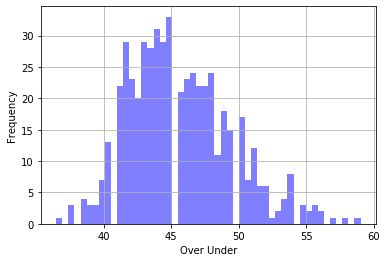

In [18]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = line_season['over_under'].values
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.grid(True)
plt.xlabel('Over Under')
plt.ylabel('Frequency')

plt.savefig('Over_Under.png')

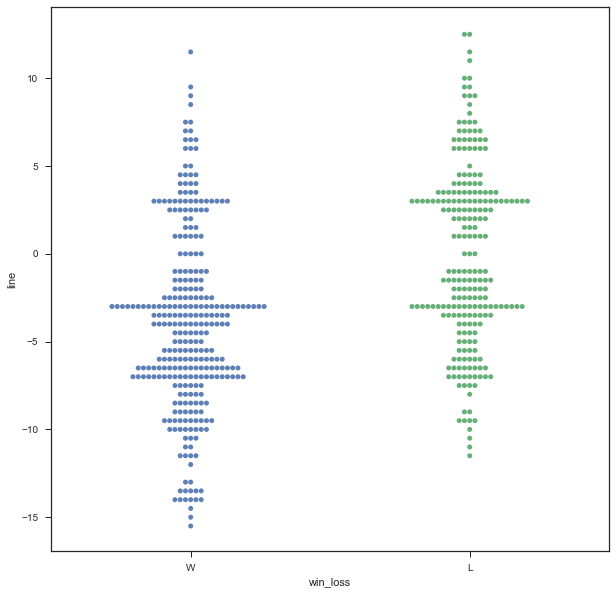

In [9]:
import seaborn as sns
from matplotlib import pyplot
import seaborn



a4_dims = (10, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="ticks")

exercise = sns.load_dataset("exercise")
g = sns.swarmplot(x="win_loss", y="line", data=line_season , alpha = .9)

plt.savefig('snsline.png')

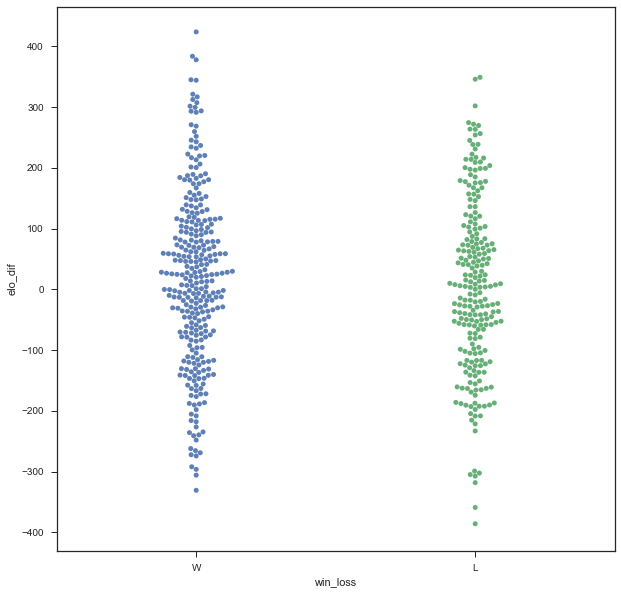

In [10]:
a4_dims = (10, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="ticks")

exercise = sns.load_dataset("exercise")
g = sns.swarmplot(x="win_loss", y="elo_dif", data=line_season , alpha = .9)

plt.savefig('snselo.png')

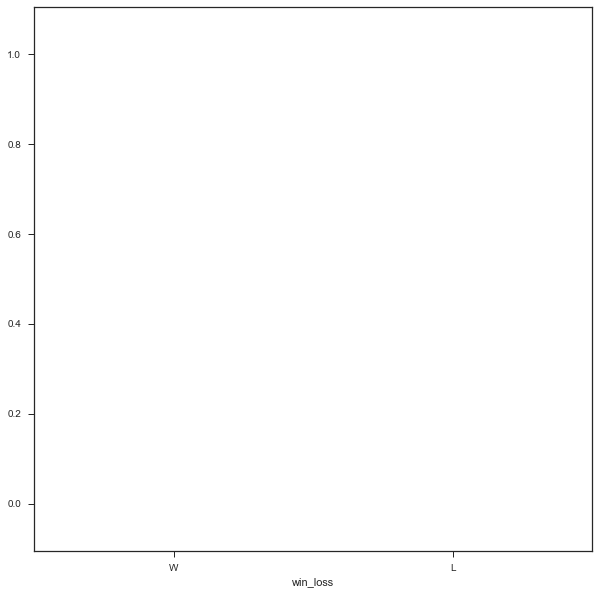

In [15]:
x1 = line_season['elo_dif'].values
y1 = line_season['line'].values

st = StandardScaler()
x1 = preprocessing.scale(x1)

y1 = preprocessing.scale(y1)

x1 = x1 * 10
y1 = y1 * 10

a4_dims = (10, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="ticks")

exercise = sns.load_dataset("exercise")
g = sns.swarmplot(x="win_loss", y= '', data=line_season , alpha = .9)


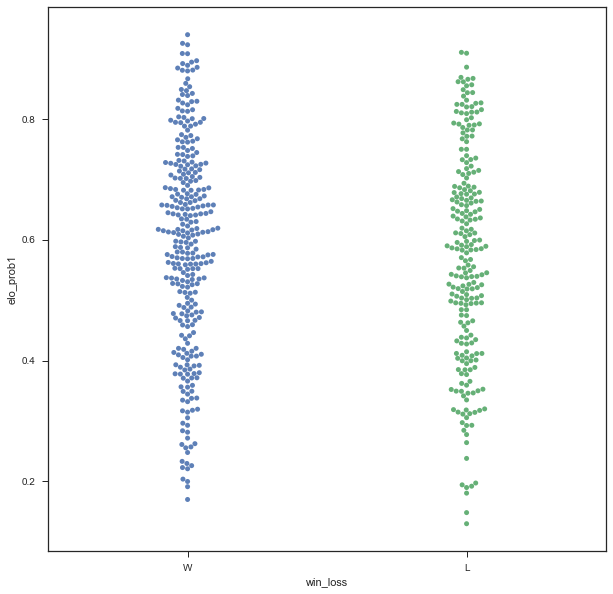

In [47]:
import seaborn as sns
from matplotlib import pyplot
import seaborn



a4_dims = (10, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="ticks")

exercise = sns.load_dataset("exercise")
g = sns.swarmplot(x="win_loss", y="elo_prob1", data=line_season , alpha = .9)

plt.savefig('snsprob.png')

In [8]:
wins = line_season.loc[line_season['win_loss'] == 'W']

In [9]:
los = line_season.loc[line_season['win_loss'] == 'L']

In [18]:
line_season['win'] = line_season['win_loss'] == 'W'
line_season

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,line,over_under,win_loss,elo_dif,win
14954,2014-09-08,2014,0,NaN,ARI,LAC,1551.021000,1559.872000,0.580109,0.419891,1556.697000,1554.196000,18,17,-3.0,46.0,W,1.149000,True
14982,2014-09-21,2014,0,NaN,ARI,SF,1579.632000,1625.705000,0.527211,0.472789,1601.219000,1604.118000,23,14,3.0,41.0,W,-36.073000,True
15026,2014-10-12,2014,0,NaN,ARI,WSH,1579.299000,1354.892000,0.841037,0.158963,1586.037000,1348.155000,30,20,-5.5,46.5,W,234.407000,True
15049,2014-10-26,2014,0,NaN,ARI,PHI,1596.012000,1582.113000,0.611632,0.388368,1608.080000,1570.045000,24,20,1.0,48.5,W,23.899000,True
15075,2014-11-09,2014,0,NaN,ARI,LAR,1636.468000,1459.566000,0.800991,0.199009,1646.833000,1449.202000,31,14,-7.0,43.5,W,186.902000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,2015-11-15,2015,0,NaN,WSH,NO,1372.880220,1466.398397,0.459051,0.540949,1411.532894,1427.745723,47,14,0.0,50.0,W,-83.518176,True
15377,2015-11-29,2015,0,NaN,WSH,NYG,1403.255116,1524.087110,0.420336,0.579664,1426.402029,1500.940197,20,14,1.0,48.0,W,-110.831993,True
15397,2015-12-07,2015,0,NaN,WSH,DAL,1426.402029,1473.037814,0.526404,0.473596,1411.684166,1487.755677,16,19,-2.0,43.0,L,-36.635784,False
15422,2015-12-20,2015,0,NaN,WSH,BUF,1430.093140,1518.680187,0.466108,0.533892,1455.974992,1492.798335,35,25,1.5,44.0,W,-78.587047,True


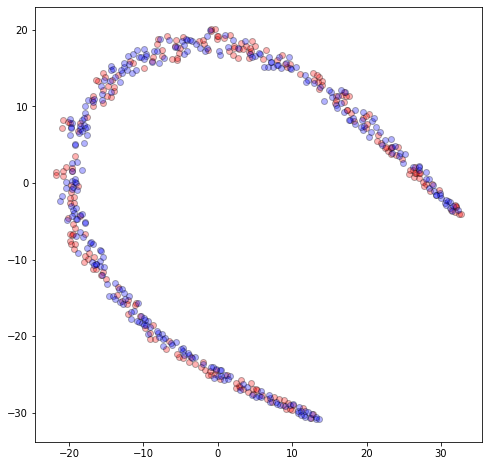

In [30]:
from sklearn.manifold import TSNE




X = line_season[['elo_dif', 'line', 'over_under' , 'elo_prob1', 'neutral']]
Y = line_season[['win']]

t = TSNE()
X_2 = t.fit_transform(X)

colors = ['red', 'blue']
plt.figure(figsize = (8,8))
for fact in [False, True]:
    idx =(Y['win']==fact)
    plt.scatter(X_2[idx,0], X_2[idx,1], edgecolor='k', color=colors[int(fact)], alpha=.3)
    

In [13]:
False == False

True

In [22]:
Y

14954     True
14982     True
15026     True
15049     True
15075     True
         ...  
15339     True
15377     True
15397    False
15422     True
15465    False
Name: win, Length: 534, dtype: bool

In [23]:
X

,elo_dif,line,over_under,elo_prob1,neutral
14954,1.149000,-3.0,46.0,0.580109,0
14982,-36.073000,3.0,41.0,0.527211,0
15026,234.407000,-5.5,46.5,0.841037,0
15049,23.899000,1.0,48.5,0.611632,0
15075,186.902000,-7.0,43.5,0.800991,0
...,...,...,...,...,...
15339,-83.518176,0.0,50.0,0.459051,0
15377,-110.831993,1.0,48.0,0.420336,0
15397,-36.635784,-2.0,43.0,0.526404,0
15422,-78.587047,1.5,44.0,0.466108,0


In [31]:
X.max()

elo_dif       423.629755
line           12.500000
over_under     59.000000
elo_prob1       0.940207
neutral         1.000000
dtype: float64

In [32]:
X.min()

elo_dif      -385.737000
line          -15.500000
over_under     36.500000
elo_prob1       0.129671
neutral         0.000000
dtype: float64

In [38]:
elo_0200 = line_season.loc[line_season['elo_dif'] < -200]



TypeError: unsupported operand type(s) for &: 'str' and 'bool'

In [48]:
q = (-200<= line_season['elo_dif'] & line_season['elo_dif'] < -100)

TypeError: unsupported operand type(s) for |: 'float' and 'bool'